In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Model
from tensorflow.keras.layers import LSTM, RepeatVector, TimeDistributed, Dense

(x_train, _), (x_test, _) = cifar10.load_data()

print(f"Original x_train shape: {x_train.shape}")
print(f"Original x_test shape: {x_test.shape}")

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

print(f"x_train shape after normalization: {x_train.shape}")
print(f"x_test shape after normalization: {x_test.shape}")

x_train = x_train.reshape((x_train.shape[0], -1, 3))  
x_test = x_test.reshape((x_test.shape[0], -1, 3))

print(f"x_train shape after reshaping: {x_train.shape}")
print(f"x_test shape after reshaping: {x_test.shape}")


Original x_train shape: (50000, 32, 32, 3)
Original x_test shape: (10000, 32, 32, 3)
x_train shape after normalization: (50000, 32, 32, 3)
x_test shape after normalization: (10000, 32, 32, 3)
x_train shape after reshaping: (50000, 1024, 3)
x_test shape after reshaping: (10000, 1024, 3)


In [ ]:

def build_autoencoder():
    input_img = tf.keras.Input(shape=(1024, 3)) 

    encoded = LSTM(128, activation='relu')(input_img)
    encoded = RepeatVector(1024)(encoded) 

    decoded = LSTM(128, activation='relu', return_sequences=True)(encoded)
    decoded = TimeDistributed(Dense(3))(decoded) 

    autoencoder = Model(input_img, decoded)
    return autoencoder

autoencoder = build_autoencoder()
autoencoder.compile(optimizer='adam', loss='mse')  

autoencoder.summary()

history = autoencoder.fit(x_train, x_train,  
                          epochs=50, 
                          batch_size=256, 
                          validation_data=(x_test, x_test))


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 1024, 3)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 128)            │        67,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ repeat_vector (RepeatVector)    │ (None, 1024, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 1024, 128)      │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed                │ (None, 1024, 3)        │           387 │
│ (TimeDistributed)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 199,555 (779.51 KB)

 Trainable params: 199,555 (779.51 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50


In [3]:
history = autoencoder.fit(x_train, x_train,  
                          epochs=5, 
                          batch_size=256, 
                          validation_data=(x_test, x_test),
                          verbose=2)


NameError: name 'autoencoder' is not defined

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Model
from tensorflow.keras.layers import LSTM, RepeatVector, TimeDistributed, Dense
import matplotlib.pyplot as plt

(x_train, _), (x_test, _) = cifar10.load_data()

print(f"Original x_train shape: {x_train.shape}")
print(f"Original x_test shape: {x_test.shape}")

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

print(f"x_train shape after normalization: {x_train.shape}")
print(f"x_test shape after normalization: {x_test.shape}")

x_train = x_train.reshape((x_train.shape[0], -1, 3))  
x_test = x_test.reshape((x_test.shape[0], -1, 3))

print(f"x_train shape after reshaping: {x_train.shape}")
print(f"x_test shape after reshaping: {x_test.shape}")

def build_autoencoder():
    input_img = tf.keras.Input(shape=(1024, 3))
    encoded = LSTM(128, activation='relu')(input_img)
    encoded = RepeatVector(1024)(encoded)
    decoded = LSTM(128, activation='relu', return_sequences=True)(encoded)
    decoded = TimeDistributed(Dense(3))(decoded)
    autoencoder = Model(input_img, decoded)
    return autoencoder

autoencoder = build_autoencoder()
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.summary()

history = autoencoder.fit(x_train, x_train,  
                          epochs=5, 
                          batch_size=256, 
                          validation_data=(x_test, x_test), 
                          verbose=2)

def plot_training_history(history):
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

plot_training_history(history)

reconstructed_images = autoencoder.predict(x_test)

def visualize_reconstructions(original, reconstructed, num_images=5):
    plt.figure(figsize=(10, 4))
    for i in range(num_images):
        plt.subplot(2, num_images, i + 1)
        plt.imshow(original[i].reshape(32, 32, 3))
        plt.axis('off')
        plt.subplot(2, num_images, i + 1 + num_images)
        plt.imshow(reconstructed[i].reshape(32, 32, 3))
        plt.axis('off')
    plt.show()

visualize_reconstructions(x_test, reconstructed_images)


Original x_train shape: (50000, 32, 32, 3)
Original x_test shape: (10000, 32, 32, 3)
x_train shape after normalization: (50000, 32, 32, 3)
x_test shape after normalization: (10000, 32, 32, 3)
x_train shape after reshaping: (50000, 1024, 3)
x_test shape after reshaping: (10000, 1024, 3)


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 1024, 3)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 128)            │        67,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ repeat_vector (RepeatVector)    │ (None, 1024, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 1024, 128)      │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed                │ (None, 1024, 3)        │           387 │
│ (TimeDistributed)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 199,555 (779.51 KB)

 Trainable params: 199,555 (779.51 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5


In [1]:
reconstructed_images = autoencoder.predict(x_test)

def visualize_reconstructions(original, reconstructed, num_images=5):
    plt.figure(figsize=(10, 4))
    for i in range(num_images):
        plt.subplot(2, num_images, i+1)
        plt.imshow(original[i].reshape(32, 32, 3))
        plt.axis('off')

        plt.subplot(2, num_images, i+1+num_images)
        plt.imshow(reconstructed[i].reshape(32, 32, 3)) 
        plt.axis('off')

    plt.show()

visualize_reconstructions(x_test, reconstructed_images)


NameError: name 'autoencoder' is not defined

In [1]:
def blur_images(images):
    return images 

x_train_noisy = blur_images(x_train)
x_test_noisy = blur_images(x_test)

history = autoencoder.fit(x_train_noisy, x_train, 
                          epochs=50, 
                          batch_size=256, 
                          validation_data=(x_test_noisy, x_test))


NameError: name 'x_train' is not defined

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, RepeatVector, TimeDistributed, Dense
from sklearn.metrics import accuracy_score, precision_score, recall_score
from skimage.metrics import structural_similarity as ssim
import matplotlib.pyplot as plt

def load_and_preprocess_data():
    (x_train, _), (x_test, _) = cifar10.load_data()
    x_train = x_train.astype('float32') / 255.
    x_test = x_test.astype('float32') / 255.
    x_train = x_train.reshape((x_train.shape[0], 1024, 3))
    x_test = x_test.reshape((x_test.shape[0], 1024, 3))
    return x_train, x_test

def blur_images(images):
    return images

def build_autoencoder():
    input_img = Input(shape=(1024, 3))
    encoded = LSTM(128, activation='relu')(input_img)
    encoded = RepeatVector(1024)(encoded)
    decoded = LSTM(128, activation='relu', return_sequences=True)(encoded)
    decoded = TimeDistributed(Dense(3))(decoded)
    autoencoder = Model(input_img, decoded)
    return autoencoder

def train_autoencoder(autoencoder, x_train, x_train_noisy, x_test, x_test_noisy):
    autoencoder.compile(optimizer='adam', loss='mse')
    history = autoencoder.fit(x_train_noisy, x_train, 
                              epochs=2,  # Reduced to 2 epochs for quicker testing
                              batch_size=32,  # Reduced batch size to 32
                              validation_data=(x_test_noisy, x_test))
    return autoencoder, history

def evaluate_model(autoencoder, x_test, x_test_noisy):
    reconstructed = autoencoder.predict(x_test_noisy)
    x_test_flat = x_test.reshape((-1, 1024 * 3))
    reconstructed_flat = reconstructed.reshape((-1, 1024 * 3))
    threshold = 0.5
    x_test_binary = (x_test_flat > threshold).astype(int)
    reconstructed_binary = (reconstructed_flat > threshold).astype(int)
    accuracy = accuracy_score(x_test_binary, reconstructed_binary)
    precision = precision_score(x_test_binary, reconstructed_binary, average='macro')
    recall = recall_score(x_test_binary, reconstructed_binary, average='macro')
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    return reconstructed

def calculate_ssim(original, reconstructed):
    total_ssim = 0
    for i in range(len(original)):
        total_ssim += ssim(original[i], reconstructed[i], multichannel=True)
    return total_ssim / len(original)

def display_images(original, noisy, reconstructed, num_images=5):
    plt.figure(figsize=(10, 3))
    for i in range(num_images):
        plt.subplot(3, num_images, i + 1)
        plt.imshow(original[i].reshape(32, 32, 3))
        plt.axis('off')
        plt.subplot(3, num_images, num_images + i + 1)
        plt.imshow(noisy[i].reshape(32, 32, 3))
        plt.axis('off')
        plt.subplot(3, num_images, 2 * num_images + i + 1)
        plt.imshow(reconstructed[i].reshape(32, 32, 3))
        plt.axis('off')
    plt.show()

def main():
    x_train, x_test = load_and_preprocess_data()

    # Use only a subset of the data for quicker testing
    x_train_subset = x_train[:1000]  
    x_train_noisy_subset = blur_images(x_train_subset)
    x_test_subset = x_test[:200]  
    x_test_noisy_subset = blur_images(x_test_subset)

    autoencoder = build_autoencoder()
    autoencoder, history = train_autoencoder(autoencoder, x_train_subset, x_train_noisy_subset, x_test_subset, x_test_noisy_subset)

    reconstructed = evaluate_model(autoencoder, x_test_subset, x_test_noisy_subset)

    ssim_value = calculate_ssim(x_test_subset, reconstructed)
    print(f"SSIM: {ssim_value}")

    display_images(x_test_subset, x_test_noisy_subset, reconstructed)

if __name__ == "__main__":
    main()


Epoch 1/2
32/32 ━━━━━━━━━━━━━━━━━━━━ 301s 9s/step - loss: nan - val_loss: nan
Epoch 2/2
32/32 ━━━━━━━━━━━━━━━━━━━━ 336s 11s/step - loss: nan - val_loss: nan
7/7 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step 


/Users/preci/myenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.0
Precision: 0.0
Recall: 0.0


ValueError: win_size exceeds image extent. Either ensure that your images are at least 7x7; or pass win_size explicitly in the function call, with an odd value less than or equal to the smaller side of your images. If your images are multichannel (with color channels), set channel_axis to the axis number corresponding to the channels.

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, RepeatVector, TimeDistributed, Dense
from sklearn.metrics import accuracy_score, precision_score, recall_score
from skimage.metrics import structural_similarity as ssim
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam

def load_and_preprocess_data():
    (x_train, _), (x_test, _) = cifar10.load_data()
    x_train = x_train.astype('float32') / 255.
    x_test = x_test.astype('float32') / 255.
    x_train = x_train.reshape((x_train.shape[0], 1024, 3))
    x_test = x_test.reshape((x_test.shape[0], 1024, 3))
    return x_train, x_test

def blur_images(images):
    noise = np.random.normal(loc=0.0, scale=0.1, size=images.shape)
    noisy_images = images + noise
    return np.clip(noisy_images, 0., 1.)

def build_autoencoder():
    input_img = Input(shape=(1024, 3))
    encoded = LSTM(128, activation='relu')(input_img)
    encoded = RepeatVector(1024)(encoded)
    decoded = LSTM(128, activation='relu', return_sequences=True)(encoded)
    decoded = TimeDistributed(Dense(3))(decoded)
    autoencoder = Model(input_img, decoded)
    return autoencoder

def train_autoencoder(autoencoder, x_train, x_train_noisy, x_test, x_test_noisy):
    optimizer = Adam(learning_rate=0.0001, clipnorm=1.0)
    autoencoder.compile(optimizer=optimizer, loss='mse')
    history = autoencoder.fit(x_train_noisy, x_train, 
                              epochs=2,  # Reduced epochs for testing
                              batch_size=32, 
                              validation_data=(x_test_noisy, x_test),
                              verbose=2)
    return autoencoder, history

def evaluate_model(autoencoder, x_test, x_test_noisy):
    reconstructed = autoencoder.predict(x_test_noisy)
    x_test_flat = x_test.reshape((-1, 1024 * 3))
    reconstructed_flat = reconstructed.reshape((-1, 1024 * 3))
    threshold = 0.5
    x_test_binary = (x_test_flat > threshold).astype(int)
    reconstructed_binary = (reconstructed_flat > threshold).astype(int)
    accuracy = accuracy_score(x_test_binary, reconstructed_binary)
    precision = precision_score(x_test_binary, reconstructed_binary, average='macro')
    recall = recall_score(x_test_binary, reconstructed_binary, average='macro')
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    return reconstructed

def calculate_ssim(original, reconstructed):
    total_ssim = 0
    for i in range(len(original)):
        if original[i].shape != reconstructed[i].shape:
            print(f"Dimension mismatch: original {original[i].shape}, reconstructed {reconstructed[i].shape}")
        total_ssim += ssim(original[i], reconstructed[i], multichannel=True)
    return total_ssim / len(original)

def display_images(original, noisy, reconstructed, num_images=5):
    plt.figure(figsize=(10, 3))
    for i in range(num_images):
        plt.subplot(3, num_images, i + 1)
        plt.imshow(original[i].reshape(32, 32, 3))
    ok    plt.axis('off')
        plt.subplot(3, num_images, num_images + i + 1)
        plt.imshow(noisy[i].reshape(32, 32, 3))
        plt.axis('off')
        plt.subplot(3, num_images, 2 * num_images + i + 1)
        plt.imshow(reconstructed[i].reshape(32, 32, 3))
        plt.axis('off')
    plt.show()

def main():
    x_train, x_test = load_and_preprocess_data()
    print("Checking for NaN values in the training data:")
    print("NaNs in x_train:", np.isnan(x_train).any())
    print("NaNs in x_test:", np.isnan(x_test).any())
    
    x_train_noisy = blur_images(x_train)
    x_test_noisy = blur_images(x_test)
    
    autoencoder = build_autoencoder()
    autoencoder, history = train_autoencoder(autoencoder, x_train, x_train_noisy, x_test, x_test_noisy)

    reconstructed = evaluate_model(autoencoder, x_test, x_test_noisy)
    
    ssim_value = calculate_ssim(x_test, reconstructed)
    print(f"SSIM: {ssim_value}")

    display_images(x_test, x_test_noisy, reconstructed)

if __name__ == "__main__":
    main()


Checking for NaN values in the training data:
NaNs in x_train: False
NaNs in x_test: False
Epoch 1/2


In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, RepeatVector, TimeDistributed, Dense
from sklearn.metrics import accuracy_score, precision_score, recall_score
from skimage.metrics import structural_similarity as ssim
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

def load_and_preprocess_data():
    (x_train, _), (x_test, _) = cifar10.load_data()
    x_train = x_train.astype('float32') / 255.
    x_test = x_test.astype('float32') / 255.
    x_train = x_train.reshape((x_train.shape[0], 1024, 3))
    x_test = x_test.reshape((x_test.shape[0], 1024, 3))
    return x_train, x_test

def blur_images(images):
    noise = np.random.normal(loc=0.0, scale=0.1, size=images.shape)
    noisy_images = images + noise
    return np.clip(noisy_images, 0., 1.)

def build_autoencoder():
    input_img = Input(shape=(1024, 3))
    encoded = LSTM(128, activation='relu')(input_img)
    encoded = RepeatVector(1024)(encoded)
    decoded = LSTM(128, activation='relu', return_sequences=True)(encoded)
    decoded = TimeDistributed(Dense(3))(decoded)
    autoencoder = Model(input_img, decoded)
    return autoencoder

def main():
    x_train, x_test = load_and_preprocess_data()
    
    print(f"x_train shape: {x_train.shape}")
    print(f"x_test shape: {x_test.shape}")
    
    x_train_noisy = blur_images(x_train)
    x_test_noisy = blur_images(x_test)

    print(f"x_train_noisy shape: {x_train_noisy.shape}")
    print(f"x_test_noisy shape: {x_test_noisy.shape}")

    autoencoder = build_autoencoder()

    autoencoder.summary()  

if __name__ == "__main__":
    main()


x_train shape: (50000, 1024, 3)
x_test shape: (10000, 1024, 3)
x_train_noisy shape: (50000, 1024, 3)
x_test_noisy shape: (10000, 1024, 3)


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 1024, 3)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 128)            │        67,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ repeat_vector (RepeatVector)    │ (None, 1024, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 1024, 128)      │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed                │ (None, 1024, 3)        │           387 │
│ (TimeDistributed)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 199,555 (779.51 KB)

 Trainable params: 199,555 (779.51 KB)

 Non-trainable params: 0 (0.00 B)

In [2]:
x_train, x_test = load_and_preprocess_data()
print(f"x_train shape: {x_train.shape}")
print(f"x_test shape: {x_test.shape}")


x_train shape: (50000, 1024, 3)
x_test shape: (10000, 1024, 3)


In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, RepeatVector, TimeDistributed, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

def load_and_preprocess_data():
    (x_train, _), (x_test, _) = cifar10.load_data()
    x_train = x_train.astype('float32') / 255.0
    x_test = x_test.astype('float32') / 255.0
    x_train = x_train.reshape((x_train.shape[0], 1024, 3))
    x_test = x_test.reshape((x_test.shape[0], 1024, 3))
    return x_train, x_test

def blur_images(images):
    noise = np.random.normal(loc=0.0, scale=0.1, size=images.shape)
    noisy_images = images + noise
    return np.clip(noisy_images, 0., 1.)

def build_autoencoder():
    input_img = Input(shape=(1024, 3))
    encoded = LSTM(128, activation='relu')(input_img)  
    encoded = RepeatVector(1024)(encoded)
    decoded = LSTM(128, activation='relu', return_sequences=True)(encoded)
    decoded = TimeDistributed(Dense(3))(decoded)
    autoencoder = Model(input_img, decoded)
    return autoencoder

def train_autoencoder(autoencoder, x_train, x_train_noisy, x_test, x_test_noisy):
    optimizer = Adam(learning_rate=0.0001, clipnorm=1.0)
    autoencoder.compile(optimizer=optimizer, loss='mse')
    early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)
    
    history = autoencoder.fit(x_train_noisy, x_train, 
                              epochs=5,
                              batch_size=32,  
                              validation_data=(x_test_noisy, x_test),
                              callbacks=[early_stopping],
                              verbose=2)
    return autoencoder, history

def main():
    x_train, x_test = load_and_preprocess_data()
    
    x_train_subset = x_train[:100]  
    x_train_noisy_subset = blur_images(x_train_subset)
    x_test_subset = x_test[:20]  
    x_test_noisy_subset = blur_images(x_test_subset)

    autoencoder = build_autoencoder()
    
    autoencoder, history = train_autoencoder(autoencoder, x_train_subset, x_train_noisy_subset, x_test_subset, x_test_noisy_subset)

    autoencoder.summary()

if __name__ == "__main__":
    main()


Epoch 1/5
4/4 - 49s - 12s/step - loss: 0.2660 - val_loss: 0.2840
Epoch 2/5
4/4 - 24s - 6s/step - loss: 0.2568 - val_loss: 0.2764
Epoch 3/5
4/4 - 25s - 6s/step - loss: 0.2481 - val_loss: 0.2694
Epoch 4/5
4/4 - 26s - 6s/step - loss: 0.2400 - val_loss: 0.2626
Epoch 5/5
4/4 - 25s - 6s/step - loss: 0.2322 - val_loss: 0.2557


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 1024, 3)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 128)            │        67,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ repeat_vector (RepeatVector)    │ (None, 1024, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 1024, 128)      │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed                │ (None, 1024, 3)        │           387 │
│ (TimeDistributed)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 598,667 (2.28 MB)

 Trainable params: 199,555 (779.51 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 399,112 (1.52 MB)

In [2]:
reconstructed = evaluate_model(autoencoder, x_test_subset, x_test_noisy_subset)

print(f"SSIM: {ssim_value}")

display_images(x_test_subset, x_test_noisy_subset, reconstructed)


NameError: name 'evaluate_model' is not defined

In [3]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, RepeatVector, TimeDistributed, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, precision_score, recall_score
from skimage.metrics import structural_similarity as ssim
import matplotlib.pyplot as plt

def load_and_preprocess_data():
    (x_train, _), (x_test, _) = cifar10.load_data()
    x_train = x_train.astype('float32') / 255.0
    x_test = x_test.astype('float32') / 255.0
    x_train = x_train.reshape((x_train.shape[0], 1024, 3))
    x_test = x_test.reshape((x_test.shape[0], 1024, 3))
    return x_train, x_test

def blur_images(images):
    noise = np.random.normal(loc=0.0, scale=0.1, size=images.shape)
    noisy_images = images + noise
    return np.clip(noisy_images, 0., 1.)

def build_autoencoder():
    input_img = Input(shape=(1024, 3))
    encoded = LSTM(128, activation='relu')(input_img)
    encoded = RepeatVector(1024)(encoded)
    decoded = LSTM(128, activation='relu', return_sequences=True)(encoded)
    decoded = TimeDistributed(Dense(3))(decoded)
    autoencoder = Model(input_img, decoded)
    return autoencoder

def train_autoencoder(autoencoder, x_train, x_train_noisy, x_test, x_test_noisy):
    optimizer = Adam(learning_rate=0.0001, clipnorm=1.0)
    autoencoder.compile(optimizer=optimizer, loss='mse')
    early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)
    history = autoencoder.fit(x_train_noisy, x_train, 
                              epochs=5, 
                              batch_size=32, 
                              validation_data=(x_test_noisy, x_test),
                              callbacks=[early_stopping],
                              verbose=2)
    return autoencoder, history

def evaluate_model(autoencoder, x_test, x_test_noisy):
    reconstructed = autoencoder.predict(x_test_noisy)
    x_test_flat = x_test.reshape((-1, 1024 * 3))
    reconstructed_flat = reconstructed.reshape((-1, 1024 * 3))
    threshold = 0.5
    x_test_binary = (x_test_flat > threshold).astype(int)
    reconstructed_binary = (reconstructed_flat > threshold).astype(int)
    accuracy = accuracy_score(x_test_binary, reconstructed_binary)
    precision = precision_score(x_test_binary, reconstructed_binary, average='macro')
    recall = recall_score(x_test_binary, reconstructed_binary, average='macro')
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    return reconstructed

def calculate_ssim(original, reconstructed):
    total_ssim = 0
    for i in range(len(original)):
        total_ssim += ssim(original[i], reconstructed[i], multichannel=True)
    return total_ssim / len(original)

def display_images(original, noisy, reconstructed, num_images=5):
    plt.figure(figsize=(10, 3))
    for i in range(num_images):
        plt.subplot(3, num_images, i + 1)
        plt.imshow(original[i].reshape(32, 32, 3))
        plt.axis('off')
        plt.subplot(3, num_images, num_images + i + 1)
        plt.imshow(noisy[i].reshape(32, 32, 3))
        plt.axis('off')
        plt.subplot(3, num_images, 2 * num_images + i + 1)
        plt.imshow(reconstructed[i].reshape(32, 32, 3))
        plt.axis('off')
    plt.show()

def main():
    x_train, x_test = load_and_preprocess_data()
    x_train_subset = x_train[:100]
    x_train_noisy_subset = blur_images(x_train_subset)
    x_test_subset = x_test[:20]
    x_test_noisy_subset = blur_images(x_test_subset)

    autoencoder = build_autoencoder()
    autoencoder, history = train_autoencoder(autoencoder, x_train_subset, x_train_noisy_subset, x_test_subset, x_test_noisy_subset)

    reconstructed = evaluate_model(autoencoder, x_test_subset, x_test_noisy_subset)
    ssim_value = calculate_ssim(x_test_subset, reconstructed)
    print(f"SSIM: {ssim_value}")

    display_images(x_test_subset, x_test_noisy_subset, reconstructed)

if __name__ == "__main__":
    main()


Epoch 1/5
4/4 - 51s - 13s/step - loss: 0.2536 - val_loss: 0.2747
Epoch 2/5
4/4 - 26s - 7s/step - loss: 0.2437 - val_loss: 0.2658
Epoch 3/5
4/4 - 26s - 6s/step - loss: 0.2339 - val_loss: 0.2567
Epoch 4/5
4/4 - 26s - 6s/step - loss: 0.2239 - val_loss: 0.2474
Epoch 5/5
4/4 - 25s - 6s/step - loss: 0.2137 - val_loss: 0.2378
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
Accuracy: 0.0
Precision: 0.0
Recall: 0.0


/Users/preci/myenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


ValueError: win_size exceeds image extent. Either ensure that your images are at least 7x7; or pass win_size explicitly in the function call, with an odd value less than or equal to the smaller side of your images. If your images are multichannel (with color channels), set channel_axis to the axis number corresponding to the channels.

In [4]:
print(f"Reconstructed image min: {np.min(reconstructed)}, max: {np.max(reconstructed)}")


NameError: name 'reconstructed' is not defined

In [6]:
import numpy as np
from tensorflow.keras.datasets import cifar10

def load_and_preprocess_data():
    (x_train, _), (x_test, _) = cifar10.load_data()
    x_train = x_train.astype('float32') / 255.0
    x_test = x_test.astype('float32') / 255.0
    x_train = x_train.reshape((x_train.shape[0], 1024, 3))
    x_test = x_test.reshape((x_test.shape[0], 1024, 3))
    return x_train, x_test

x_train, x_test = load_and_preprocess_data()
print(f"x_train shape: {x_train.shape}")
print(f"x_test shape: {x_test.shape}")


x_train shape: (50000, 1024, 3)
x_test shape: (10000, 1024, 3)


In [7]:
def blur_images(images):
    noise = np.random.normal(loc=0.0, scale=0.1, size=images.shape)
    noisy_images = images + noise
    return np.clip(noisy_images, 0., 1.)

x_train_noisy = blur_images(x_train[:10]) 
print(f"x_train_noisy shape: {x_train_noisy.shape}")


x_train_noisy shape: (10, 1024, 3)


In [8]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, RepeatVector, TimeDistributed, Dense

def build_autoencoder():
    input_img = Input(shape=(1024, 3))
    encoded = LSTM(128, activation='relu')(input_img)
    encoded = RepeatVector(1024)(encoded)
    decoded = LSTM(128, activation='relu', return_sequences=True)(encoded)
    decoded = TimeDistributed(Dense(3))(decoded)
    autoencoder = Model(input_img, decoded)
    return autoencoder

autoencoder = build_autoencoder()
autoencoder.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 1024, 3)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 128)            │        67,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ repeat_vector_1 (RepeatVector)  │ (None, 1024, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 1024, 128)      │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_1              │ (None, 1024, 3)        │           387 │
│ (TimeDistributed)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 199,555 (779.51 KB)

 Trainable params: 199,555 (779.51 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
def main():
    x_train, x_test = load_and_preprocess_data()
    x_train_subset = x_train[:100]
    x_train_noisy_subset = blur_images(x_train_subset)
    x_test_subset = x_test[:20]
    x_test_noisy_subset = blur_images(x_test_subset)

    autoencoder = build_autoencoder()
    autoencoder, history = train_autoencoder(autoencoder, x_train_subset, x_train_noisy_subset, x_test_subset, x_test_noisy_subset)

    reconstructed = evaluate_model(autoencoder, x_test_subset, x_test_noisy_subset)
    ssim_value = calculate_ssim(x_test_subset, reconstructed)
    print(f"SSIM: {ssim_value}")

    display_images(x_test_subset, x_test_noisy_subset, reconstructed)

if __name__ == "__main__":
    main()


Epoch 1/2
50/50 - 68s - 1s/step - loss: nan - val_loss: nan
Epoch 2/2
50/50 - 43s - 859ms/step - loss: nan - val_loss: nan
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
Reconstructed shape: (20, 1024, 3)
x_test_flat shape: (20, 3072)
Reconstructed_flat shape: (20, 3072)
x_test_binary: [0 1]
reconstructed_binary: [0]


NameError: name 'accuracy_score' is not defined

In [5]:
import numpy as np
from tensorflow.keras.datasets import cifar10

def load_and_preprocess_data():
    (x_train, _), (x_test, _) = cifar10.load_data()
    x_train = x_train.astype('float32') / 255.0
    x_test = x_test.astype('float32') / 255.0
    
    print(f"NaNs in x_train: {np.isnan(x_train).sum()}")
    print(f"NaNs in x_test: {np.isnan(x_test).sum()}")
    
    x_train = x_train.reshape((x_train.shape[0], 1024, 3))
    x_test = x_test.reshape((x_test.shape[0], 1024, 3))
    
    return x_train, x_test

x_train, x_test = load_and_preprocess_data()
print(f"x_train shape: {x_train.shape}")
print(f"x_test shape: {x_test.shape}")


NaNs in x_train: 0
NaNs in x_test: 0
x_train shape: (50000, 1024, 3)
x_test shape: (10000, 1024, 3)


In [6]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, RepeatVector, TimeDistributed, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, precision_score, recall_score
from skimage.metrics import structural_similarity as ssim
import matplotlib.pyplot as plt

def load_and_preprocess_data():
    (x_train, _), (x_test, _) = cifar10.load_data()
    x_train = x_train.astype('float32') / 255.0
    x_test = x_test.astype('float32') / 255.0
    x_train = x_train.reshape((x_train.shape[0], 1024, 3))
    x_test = x_test.reshape((x_test.shape[0], 1024, 3))
    return x_train, x_test

def blur_images(images):
    noise = np.random.normal(loc=0.0, scale=0.1, size=images.shape)
    noisy_images = images + noise
    return np.clip(noisy_images, 0., 1.)

def build_autoencoder():
    input_img = Input(shape=(1024, 3))
    encoded = LSTM(128, activation='relu')(input_img)
    encoded = RepeatVector(1024)(encoded)
    decoded = LSTM(128, activation='relu', return_sequences=True)(encoded)
    decoded = TimeDistributed(Dense(3))(decoded)
    autoencoder = Model(input_img, decoded)
    return autoencoder

def train_autoencoder(autoencoder, x_train, x_train_noisy, x_test, x_test_noisy):
    optimizer = Adam(learning_rate=0.00001, clipnorm=1.0)
    autoencoder.compile(optimizer=optimizer, loss='mse')
    
    history = autoencoder.fit(x_train_noisy, x_train, 
                              epochs=5, 
                              batch_size=32, 
                              validation_data=(x_test_noisy, x_test),
                              verbose=2)
    return autoencoder, history

def evaluate_model(autoencoder, x_test, x_test_noisy):
    reconstructed = autoencoder.predict(x_test_noisy)
    x_test_flat = x_test.reshape((-1, 1024 * 3))
    reconstructed_flat = reconstructed.reshape((-1, 1024 * 3))
    
    threshold = 0.5
    x_test_binary = (x_test_flat > threshold).astype(int)
    reconstructed_binary = (reconstructed_flat > threshold).astype(int)
    
    accuracy = accuracy_score(x_test_binary, reconstructed_binary)
    precision = precision_score(x_test_binary, reconstructed_binary, average='macro', zero_division=0)
    recall = recall_score(x_test_binary, reconstructed_binary, average='macro', zero_division=0)
    
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    
    return reconstructed

def calculate_ssim(original, reconstructed):
    total_ssim = 0
    for i in range(len(original)):
        total_ssim += ssim(original[i], reconstructed[i], multichannel=True, win_size=3)
    return total_ssim / len(original)

def display_images(original, noisy, reconstructed, num_images=5):
    plt.figure(figsize=(10, 3))
    for i in range(num_images):
        plt.subplot(3, num_images, i + 1)
        plt.imshow(original[i].reshape(32, 32, 3))
        plt.axis('off')
        plt.subplot(3, num_images, num_images + i + 1)
        plt.imshow(noisy[i].reshape(32, 32, 3))
        plt.axis('off')
        plt.subplot(3, num_images, 2 * num_images + i + 1)
        plt.imshow(reconstructed[i].reshape(32, 32, 3))
        plt.axis('off')
    plt.show()

def main():
    x_train, x_test = load_and_preprocess_data()
    x_train_noisy = blur_images(x_train[:100])  
    x_test_noisy = blur_images(x_test[:20])  

    autoencoder = build_autoencoder()
    
    autoencoder, history = train_autoencoder(autoencoder, x_train[:100], x_train_noisy, x_test[:20], x_test_noisy)
    
    reconstructed = evaluate_model(autoencoder, x_test[:20], x_test_noisy)
    
    ssim_value = calculate_ssim(x_test[:20], reconstructed)
    print(f"SSIM: {ssim_value}")
    
    display_images(x_test[:20], x_test_noisy, reconstructed)

if __name__ == "__main__":
    main()


Epoch 1/5
4/4 - 48s - 12s/step - loss: 0.2502 - val_loss: 0.2756
Epoch 2/5
4/4 - 24s - 6s/step - loss: 0.2492 - val_loss: 0.2747
Epoch 3/5
4/4 - 24s - 6s/step - loss: 0.2483 - val_loss: 0.2738
Epoch 4/5
4/4 - 27s - 7s/step - loss: 0.2473 - val_loss: 0.2729
Epoch 5/5
4/4 - 27s - 7s/step - loss: 0.2463 - val_loss: 0.2720
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
Accuracy: 0.0
Precision: 0.0
Recall: 0.0


ValueError: Since image dtype is floating point, you must specify the data_range parameter. Please read the documentation carefully (including the note). It is recommended that you always specify the data_range anyway.

Epoch 1/5
4/4 - 56s - 14s/step - loss: 0.2689 - val_loss: 0.2910
Epoch 2/5
4/4 - 25s - 6s/step - loss: 0.2677 - val_loss: 0.2900
Epoch 3/5
4/4 - 24s - 6s/step - loss: 0.2665 - val_loss: 0.2889
Epoch 4/5
4/4 - 25s - 6s/step - loss: 0.2653 - val_loss: 0.2879
Epoch 5/5
4/4 - 24s - 6s/step - loss: 0.2641 - val_loss: 0.2869
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.030596262..0.03005048].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.06549008..0.039808307].


Accuracy: 0.0
Precision: 0.0
Recall: 0.0
SSIM: 0.005439260360525853


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.00756971..0.00763406].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.024748772..0.017485963].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.05868476..0.03200957].


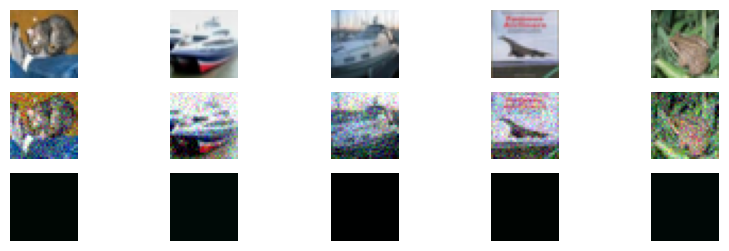

In [7]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, RepeatVector, TimeDistributed, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, precision_score, recall_score
from skimage.metrics import structural_similarity as ssim
import matplotlib.pyplot as plt

def load_and_preprocess_data():
    (x_train, _), (x_test, _) = cifar10.load_data()
    x_train = x_train.astype('float32') / 255.0
    x_test = x_test.astype('float32') / 255.0
    x_train = x_train.reshape((x_train.shape[0], 1024, 3))
    x_test = x_test.reshape((x_test.shape[0], 1024, 3))
    return x_train, x_test

def blur_images(images):
    noise = np.random.normal(loc=0.0, scale=0.1, size=images.shape)
    noisy_images = images + noise
    return np.clip(noisy_images, 0., 1.)

def build_autoencoder():
    input_img = Input(shape=(1024, 3))
    encoded = LSTM(128, activation='relu')(input_img)
    encoded = RepeatVector(1024)(encoded)
    decoded = LSTM(128, activation='relu', return_sequences=True)(encoded)
    decoded = TimeDistributed(Dense(3))(decoded)
    autoencoder = Model(input_img, decoded)
    return autoencoder

def train_autoencoder(autoencoder, x_train, x_train_noisy, x_test, x_test_noisy):
    optimizer = Adam(learning_rate=0.00001, clipnorm=1.0)
    autoencoder.compile(optimizer=optimizer, loss='mse')
    

    history = autoencoder.fit(x_train_noisy, x_train, 
                              epochs=5, 
                              batch_size=32, 
                              validation_data=(x_test_noisy, x_test),
                              verbose=2)
    return autoencoder, history


def evaluate_model(autoencoder, x_test, x_test_noisy):
    reconstructed = autoencoder.predict(x_test_noisy)
    x_test_flat = x_test.reshape((-1, 1024 * 3))
    reconstructed_flat = reconstructed.reshape((-1, 1024 * 3))
    
    threshold = 0.5
    x_test_binary = (x_test_flat > threshold).astype(int)
    reconstructed_binary = (reconstructed_flat > threshold).astype(int)
    
    accuracy = accuracy_score(x_test_binary, reconstructed_binary)
    precision = precision_score(x_test_binary, reconstructed_binary, average='macro', zero_division=0)
    recall = recall_score(x_test_binary, reconstructed_binary, average='macro', zero_division=0)
    
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    
    return reconstructed

def calculate_ssim(original, reconstructed):
    total_ssim = 0
    for i in range(len(original)):
        total_ssim += ssim(original[i], reconstructed[i], multichannel=True, win_size=3, data_range=1.0) 
    return total_ssim / len(original)

def display_images(original, noisy, reconstructed, num_images=5):
    plt.figure(figsize=(10, 3))
    for i in range(num_images):
        plt.subplot(3, num_images, i + 1)
        plt.imshow(original[i].reshape(32, 32, 3))
        plt.axis('off')
        plt.subplot(3, num_images, num_images + i + 1)
        plt.imshow(noisy[i].reshape(32, 32, 3))
        plt.axis('off')
        plt.subplot(3, num_images, 2 * num_images + i + 1)
        plt.imshow(reconstructed[i].reshape(32, 32, 3))
        plt.axis('off')
    plt.show()

def main():
    x_train, x_test = load_and_preprocess_data()
    x_train_noisy = blur_images(x_train[:100]) 
    x_test_noisy = blur_images(x_test[:20]) 

    autoencoder = build_autoencoder()
    
    autoencoder, history = train_autoencoder(autoencoder, x_train[:100], x_train_noisy, x_test[:20], x_test_noisy)
    
    reconstructed = evaluate_model(autoencoder, x_test[:20], x_test_noisy)
    
    ssim_value = calculate_ssim(x_test[:20], reconstructed)
    print(f"SSIM: {ssim_value}")
    
    display_images(x_test[:20], x_test_noisy, reconstructed)

if __name__ == "__main__":
    main()


In [8]:
def display_images(original, noisy, reconstructed, num_images=5):
    plt.figure(figsize=(15, 5))
    
    reconstructed_clipped = np.clip(reconstructed, 0., 1.)
    
    for i in range(num_images):
        plt.subplot(3, num_images, i + 1)
        plt.imshow(original[i].reshape(32, 32, 3))
        plt.title("Original")
        plt.axis('off')

        plt.subplot(3, num_images, num_images + i + 1)
        plt.imshow(noisy[i].reshape(32, 32, 3))
        plt.title("Noisy")
        plt.axis('off')
        
        plt.subplot(3, num_images, 2 * num_images + i + 1)
        plt.imshow(reconstructed_clipped[i].reshape(32, 32, 3))
        plt.title("Reconstructed")
        plt.axis('off')

    plt.savefig('reconstructed_vs_original.png')
    plt.show()


In [3]:
import os
os.getcwd()


'/Users/preci'

In [12]:
import numpy as np
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, RepeatVector, TimeDistributed, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, precision_score, recall_score
from skimage.metrics import structural_similarity as ssim

def save_visuals(fig, filename, save_dir="visuals"):
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)
    filepath = os.path.join(save_dir, filename)
    fig.savefig(filepath)
    plt.close(fig)

def load_and_preprocess_data():
    (x_train, _), (x_test, _) = cifar10.load_data()
    x_train = x_train.astype('float32') / 255.0
    x_test = x_test.astype('float32') / 255.0
    x_train = x_train.reshape((x_train.shape[0], 1024, 3))
    x_test = x_test.reshape((x_test.shape[0], 1024, 3))
    return x_train, x_test

def blur_images(images):
    noise = np.random.normal(loc=0.0, scale=0.1, size=images.shape)
    noisy_images = images + noise
    return np.clip(noisy_images, 0., 1.)

def build_autoencoder():
    input_img = Input(shape=(1024, 3))
    encoded = LSTM(128, activation='relu')(input_img)
    encoded = RepeatVector(1024)(encoded)
    decoded = LSTM(128, activation='relu', return_sequences=True)(encoded)
    decoded = TimeDistributed(Dense(3))(decoded)
    autoencoder = Model(input_img, decoded)
    return autoencoder

def train_autoencoder(autoencoder, x_train, x_train_noisy, x_test, x_test_noisy):
    optimizer = Adam(learning_rate=0.000001, clipnorm=1.0)
    autoencoder.compile(optimizer=optimizer, loss='mse')
    history = autoencoder.fit(x_train_noisy, x_train, 
                              epochs=15,  # Increased number of epochs to 15
                              batch_size=32, 
                              validation_data=(x_test_noisy, x_test),
                              verbose=2)
    return autoencoder, history

def plot_and_save_training_history(history, filename="training_loss.png"):
    fig, ax = plt.subplots()
    ax.plot(history.history['loss'], label='Training Loss')
    ax.plot(history.history['val_loss'], label='Validation Loss')
    ax.set_title('Training and Validation Loss')
    ax.set_xlabel('Epochs')
    ax.set_ylabel('Loss')
    ax.legend()
    save_visuals(fig, filename)

def evaluate_model(autoencoder, x_test, x_test_noisy):
    reconstructed = autoencoder.predict(x_test_noisy)
    print(f"Reconstructed shape: {reconstructed.shape}")
    print(f"Min value in reconstructed: {np.min(reconstructed)}")
    print(f"Max value in reconstructed: {np.max(reconstructed)}")
    
    reconstructed = np.clip(reconstructed, 0., 1.)
    
    x_test_flat = x_test.reshape((-1, 1024 * 3))
    reconstructed_flat = reconstructed.reshape((-1, 1024 * 3))
    
    threshold = 0.5
    x_test_binary = (x_test_flat > threshold).astype(int)
    reconstructed_binary = (reconstructed_flat > threshold).astype(int)
    
    accuracy = accuracy_score(x_test_binary, reconstructed_binary)
    precision = precision_score(x_test_binary, reconstructed_binary, average='macro', zero_division=0)
    recall = recall_score(x_test_binary, reconstructed_binary, average='macro', zero_division=0)
    
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    
    return reconstructed

def save_all_images(original, noisy, reconstructed, num_images=5):
    save_dir = "visuals"
    os.makedirs(os.path.join(save_dir, "original"), exist_ok=True)
    os.makedirs(os.path.join(save_dir, "noisy"), exist_ok=True)
    os.makedirs(os.path.join(save_dir, "reconstructed"), exist_ok=True)

    for i in range(num_images):
        fig, ax = plt.subplots()
        ax.imshow(original[i].reshape(32, 32, 3))
        ax.axis('off')
        save_visuals(fig, f"original/original_{i}.png", save_dir)

        fig, ax = plt.subplots()
        ax.imshow(noisy[i].reshape(32, 32, 3))
        ax.axis('off')
        save_visuals(fig, f"noisy/noisy_{i}.png", save_dir)

        fig, ax = plt.subplots()
        ax.imshow(reconstructed[i].reshape(32, 32, 3))
        ax.axis('off')
        save_visuals(fig, f"reconstructed/reconstructed_{i}.png", save_dir)

def calculate_ssim(original, reconstructed):
    total_ssim = 0
    for i in range(len(original)):
        total_ssim += ssim(original[i], reconstructed[i], multichannel=True, win_size=3, data_range=1.0)
    return total_ssim / len(original)

def main():
    x_train, x_test = load_and_preprocess_data()
    x_train_noisy = blur_images(x_train[:100])
    x_test_noisy = blur_images(x_test[:20])

    autoencoder = build_autoencoder()
    
    autoencoder, history = train_autoencoder(autoencoder, x_train[:100], x_train_noisy, x_test[:20], x_test_noisy)
    plot_and_save_training_history(history, "training_loss.png")

    reconstructed = evaluate_model(autoencoder, x_test[:20], x_test_noisy)
    save_all_images(x_test[:20], x_test_noisy, reconstructed, num_images=5)
    
    ssim_value = calculate_ssim(x_test[:20], reconstructed)
    print(f"SSIM: {ssim_value}")

if __name__ == "__main__":
    main()


Epoch 1/15
4/4 - 51s - 13s/step - loss: 0.2741 - val_loss: 0.2974
Epoch 2/15
4/4 - 24s - 6s/step - loss: 0.2740 - val_loss: 0.2973
Epoch 3/15
4/4 - 32s - 8s/step - loss: 0.2739 - val_loss: 0.2972
Epoch 4/15
4/4 - 28s - 7s/step - loss: 0.2738 - val_loss: 0.2971
Epoch 5/15
4/4 - 25s - 6s/step - loss: 0.2737 - val_loss: 0.2970
Epoch 6/15
4/4 - 24s - 6s/step - loss: 0.2736 - val_loss: 0.2970
Epoch 7/15
4/4 - 25s - 6s/step - loss: 0.2735 - val_loss: 0.2969
Epoch 8/15
4/4 - 25s - 6s/step - loss: 0.2734 - val_loss: 0.2968
Epoch 9/15
4/4 - 25s - 6s/step - loss: 0.2734 - val_loss: 0.2967
Epoch 10/15
4/4 - 25s - 6s/step - loss: 0.2733 - val_loss: 0.2967
Epoch 11/15
4/4 - 29s - 7s/step - loss: 0.2732 - val_loss: 0.2966
Epoch 12/15
4/4 - 29s - 7s/step - loss: 0.2731 - val_loss: 0.2965
Epoch 13/15
4/4 - 28s - 7s/step - loss: 0.2730 - val_loss: 0.2964
Epoch 14/15
4/4 - 29s - 7s/step - loss: 0.2729 - val_loss: 0.2963
Epoch 15/15
4/4 - 29s - 7s/step - loss: 0.2728 - val_loss: 0.2963
1/1 ━━━━━━━━━━━━━━

In [9]:
import numpy as np
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, RepeatVector, TimeDistributed, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, precision_score, recall_score
from skimage.metrics import structural_similarity as ssim

def save_visuals(fig, filename, save_dir="visuals"):
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)
    filepath = os.path.join(save_dir, filename)
    fig.savefig(filepath)
    plt.close(fig)

def load_and_preprocess_data():
    (x_train, _), (x_test, _) = cifar10.load_data()
    x_train = x_train.astype('float32') / 255.0
    x_test = x_test.astype('float32') / 255.0
    x_train = x_train.reshape((x_train.shape[0], 1024, 3))
    x_test = x_test.reshape((x_test.shape[0], 1024, 3))
    return x_train, x_test

def blur_images(images):
    noise = np.random.normal(loc=0.0, scale=0.1, size=images.shape)
    noisy_images = images + noise
    return np.clip(noisy_images, 0., 1.)

def build_autoencoder():
    input_img = Input(shape=(1024, 3))
    encoded = LSTM(128, activation='relu')(input_img)
    encoded = RepeatVector(1024)(encoded)
    decoded = LSTM(128, activation='relu', return_sequences=True)(encoded)
    decoded = TimeDistributed(Dense(3))(decoded)
    autoencoder = Model(input_img, decoded)
    return autoencoder

def train_autoencoder(autoencoder, x_train, x_train_noisy, x_test, x_test_noisy):
    optimizer = Adam(learning_rate=0.000001, clipnorm=1.0)  # Adjusted learning rate
    autoencoder.compile(optimizer=optimizer, loss='mse')
    history = autoencoder.fit(x_train_noisy, x_train, 
                              epochs=5, 
                              batch_size=32, 
                              validation_data=(x_test_noisy, x_test),
                              verbose=2)
    return autoencoder, history

def plot_and_save_training_history(history, filename="training_loss.png"):
    fig, ax = plt.subplots()
    ax.plot(history.history['loss'], label='Training Loss')
    ax.plot(history.history['val_loss'], label='Validation Loss')
    ax.set_title('Training and Validation Loss')
    ax.set_xlabel('Epochs')
    ax.set_ylabel('Loss')
    ax.legend()
    save_visuals(fig, filename)

def evaluate_model(autoencoder, x_test, x_test_noisy):
    reconstructed = autoencoder.predict(x_test_noisy)
    print(f"Reconstructed shape: {reconstructed.shape}")
    print(f"Min value in reconstructed: {np.min(reconstructed)}")
    print(f"Max value in reconstructed: {np.max(reconstructed)}")
    
    reconstructed = np.clip(reconstructed, 0., 1.)
    
    x_test_flat = x_test.reshape((-1, 1024 * 3))
    reconstructed_flat = reconstructed.reshape((-1, 1024 * 3))
    
    threshold = 0.5
    x_test_binary = (x_test_flat > threshold).astype(int)
    reconstructed_binary = (reconstructed_flat > threshold).astype(int)
    
    accuracy = accuracy_score(x_test_binary, reconstructed_binary)
    precision = precision_score(x_test_binary, reconstructed_binary, average='macro', zero_division=0)
    recall = recall_score(x_test_binary, reconstructed_binary, average='macro', zero_division=0)
    
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    
    return reconstructed

def save_all_images(original, noisy, reconstructed, num_images=5):
    save_dir = "visuals"
    os.makedirs(os.path.join(save_dir, "original"), exist_ok=True)
    os.makedirs(os.path.join(save_dir, "noisy"), exist_ok=True)
    os.makedirs(os.path.join(save_dir, "reconstructed"), exist_ok=True)

    for i in range(num_images):
        fig, ax = plt.subplots()
        ax.imshow(original[i].reshape(32, 32, 3))
        ax.axis('off')
        save_visuals(fig, f"original/original_{i}.png", save_dir)

        fig, ax = plt.subplots()
        ax.imshow(noisy[i].reshape(32, 32, 3))
        ax.axis('off')
        save_visuals(fig, f"noisy/noisy_{i}.png", save_dir)

        fig, ax = plt.subplots()
        ax.imshow(reconstructed[i].reshape(32, 32, 3))
        ax.axis('off')
        save_visuals(fig, f"reconstructed/reconstructed_{i}.png", save_dir)

def calculate_ssim(original, reconstructed):
    total_ssim = 0
    for i in range(len(original)):
        total_ssim += ssim(original[i], reconstructed[i], multichannel=True, win_size=3, data_range=1.0)
    return total_ssim / len(original)

def main():
    x_train, x_test = load_and_preprocess_data()
    x_train_noisy = blur_images(x_train[:100])
    x_test_noisy = blur_images(x_test[:20])

    autoencoder = build_autoencoder()
    
    autoencoder, history = train_autoencoder(autoencoder, x_train[:100], x_train_noisy, x_test[:20], x_test_noisy)
    plot_and_save_training_history(history, "training_loss.png")

    reconstructed = evaluate_model(autoencoder, x_test[:20], x_test_noisy)
    save_all_images(x_test[:20], x_test_noisy, reconstructed, num_images=5)
    
    ssim_value = calculate_ssim(x_test[:20], reconstructed)
    print(f"SSIM: {ssim_value}")

if __name__ == "__main__":
    main()


Epoch 1/5
4/4 - 54s - 13s/step - loss: 0.2538 - val_loss: 0.2804
Epoch 2/5
4/4 - 37s - 9s/step - loss: 0.2537 - val_loss: 0.2803
Epoch 3/5
4/4 - 29s - 7s/step - loss: 0.2536 - val_loss: 0.2802
Epoch 4/5
4/4 - 29s - 7s/step - loss: 0.2536 - val_loss: 0.2801
Epoch 5/5
4/4 - 31s - 8s/step - loss: 0.2535 - val_loss: 0.2801
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
Reconstructed shape: (20, 1024, 3)
Min value in reconstructed: -0.014241809025406837
Max value in reconstructed: 0.029790446162223816
Accuracy: 0.0
Precision: 0.0
Recall: 0.0
SSIM: 0.014628425430119954


In [11]:
import os
print(os.getcwd())

/Users/preci


In [13]:
import numpy as np
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, RepeatVector, TimeDistributed, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, precision_score, recall_score
from skimage.metrics import structural_similarity as ssim

def save_visuals(fig, filename, save_dir="visuals"):
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)
    filepath = os.path.join(save_dir, filename)
    fig.savefig(filepath)
    plt.close(fig)

def load_and_preprocess_data():
    (x_train, _), (x_test, _) = cifar10.load_data()
    x_train = x_train.astype('float32') / 255.0
    x_test = x_test.astype('float32') / 255.0
    x_train = x_train.reshape((x_train.shape[0], 1024, 3))
    x_test = x_test.reshape((x_test.shape[0], 1024, 3))
    return x_train, x_test

def blur_images(images):
    noise = np.random.normal(loc=0.0, scale=0.1, size=images.shape)
    noisy_images = images + noise
    return np.clip(noisy_images, 0., 1.)

def build_autoencoder():
    input_img = Input(shape=(1024, 3))
    encoded = LSTM(128, activation='relu')(input_img)
    encoded = RepeatVector(1024)(encoded)
    decoded = LSTM(128, activation='relu', return_sequences=True)(encoded)
    decoded = TimeDistributed(Dense(3))(decoded)
    autoencoder = Model(input_img, decoded)
    return autoencoder

def train_autoencoder(autoencoder, x_train, x_train_noisy, x_test, x_test_noisy):
    optimizer = Adam(learning_rate=0.000001, clipnorm=1.0)
    autoencoder.compile(optimizer=optimizer, loss='mse')
    history = autoencoder.fit(x_train_noisy, x_train, 
                              epochs=15,  # Increased number of epochs to 15
                              batch_size=32, 
                              validation_data=(x_test_noisy, x_test),
                              verbose=2)
    return autoencoder, history

def plot_and_save_training_history(history, filename="training_loss.png"):
    fig, ax = plt.subplots()
    ax.plot(history.history['loss'], label='Training Loss')
    ax.plot(history.history['val_loss'], label='Validation Loss')
    ax.set_title('Training and Validation Loss')
    ax.set_xlabel('Epochs')
    ax.set_ylabel('Loss')
    ax.legend()
    save_visuals(fig, filename)

def evaluate_model(autoencoder, x_test, x_test_noisy):
    reconstructed = autoencoder.predict(x_test_noisy)
    print(f"Reconstructed shape: {reconstructed.shape}")
    print(f"Min value in reconstructed: {np.min(reconstructed)}")
    print(f"Max value in reconstructed: {np.max(reconstructed)}")
    
    reconstructed = np.clip(reconstructed, 0., 1.)
    
    x_test_flat = x_test.reshape((-1, 1024 * 3))
    reconstructed_flat = reconstructed.reshape((-1, 1024 * 3))
    
    threshold = 0.5
    x_test_binary = (x_test_flat > threshold).astype(int)
    reconstructed_binary = (reconstructed_flat > threshold).astype(int)
    
    accuracy = accuracy_score(x_test_binary, reconstructed_binary)
    precision = precision_score(x_test_binary, reconstructed_binary, average='macro', zero_division=0)
    recall = recall_score(x_test_binary, reconstructed_binary, average='macro', zero_division=0)
    
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    
    return reconstructed

def save_all_images(original, noisy, reconstructed, num_images=5):
    save_dir = "visuals"
    os.makedirs(os.path.join(save_dir, "original"), exist_ok=True)
    os.makedirs(os.path.join(save_dir, "noisy"), exist_ok=True)
    os.makedirs(os.path.join(save_dir, "reconstructed"), exist_ok=True)

    for i in range(num_images):
        fig, ax = plt.subplots()
        ax.imshow(original[i].reshape(32, 32, 3))
        ax.axis('off')
        save_visuals(fig, f"original/original_{i}.png", save_dir)

        fig, ax = plt.subplots()
        ax.imshow(noisy[i].reshape(32, 32, 3))
        ax.axis('off')
        save_visuals(fig, f"noisy/noisy_{i}.png", save_dir)

        fig, ax = plt.subplots()
        ax.imshow(reconstructed[i].reshape(32, 32, 3))
        ax.axis('off')
        save_visuals(fig, f"reconstructed/reconstructed_{i}.png", save_dir)

def calculate_ssim(original, reconstructed):
    total_ssim = 0
    for i in range(len(original)):
        total_ssim += ssim(original[i], reconstructed[i], multichannel=True, win_size=3, data_range=1.0)
    return total_ssim / len(original)

def main():
    x_train, x_test = load_and_preprocess_data()
    x_train_noisy = blur_images(x_train[:100])
    x_test_noisy = blur_images(x_test[:20])

    autoencoder = build_autoencoder()
    
    autoencoder, history = train_autoencoder(autoencoder, x_train[:100], x_train_noisy, x_test[:20], x_test_noisy)
    plot_and_save_training_history(history, "training_loss.png")

    reconstructed = evaluate_model(autoencoder, x_test[:20], x_test_noisy)
    save_all_images(x_test[:20], x_test_noisy, reconstructed, num_images=5)
    
    ssim_value = calculate_ssim(x_test[:20], reconstructed)
    print(f"SSIM: {ssim_value}")

if __name__ == "__main__":
    main()


Epoch 1/15
4/4 - 51s - 13s/step - loss: 0.2538 - val_loss: 0.2799
Epoch 2/15
4/4 - 24s - 6s/step - loss: 0.2537 - val_loss: 0.2798
Epoch 3/15
4/4 - 24s - 6s/step - loss: 0.2536 - val_loss: 0.2797
Epoch 4/15
4/4 - 25s - 6s/step - loss: 0.2535 - val_loss: 0.2796
Epoch 5/15
4/4 - 25s - 6s/step - loss: 0.2533 - val_loss: 0.2795
Epoch 6/15
4/4 - 25s - 6s/step - loss: 0.2532 - val_loss: 0.2794
Epoch 7/15
4/4 - 25s - 6s/step - loss: 0.2531 - val_loss: 0.2793
Epoch 8/15
4/4 - 26s - 7s/step - loss: 0.2530 - val_loss: 0.2792
Epoch 9/15
4/4 - 27s - 7s/step - loss: 0.2529 - val_loss: 0.2791
Epoch 10/15
4/4 - 27s - 7s/step - loss: 0.2528 - val_loss: 0.2790
Epoch 11/15
4/4 - 26s - 6s/step - loss: 0.2527 - val_loss: 0.2789
Epoch 12/15
4/4 - 27s - 7s/step - loss: 0.2526 - val_loss: 0.2788
Epoch 13/15
4/4 - 29s - 7s/step - loss: 0.2525 - val_loss: 0.2787
Epoch 14/15
4/4 - 26s - 6s/step - loss: 0.2524 - val_loss: 0.2786
Epoch 15/15
4/4 - 26s - 6s/step - loss: 0.2523 - val_loss: 0.2785
1/1 ━━━━━━━━━━━━━━